# Battle of Neighborhoods

## Dallas, Texas

![](https://d1x7qj5rlh2e19.cloudfront.net/wp-content/uploads/2018/08/24140622/Texas_3_Dallas-copy.jpg)

## Project Description:
Whenever people move to any other place, they explore the place and try to fetch as much information as possible about it. It can be the neighborhood, locality, market, price of the place and many more factors including neighborhood analysis. This is can be termed as request for a search algorithm which usually returns the requested features such as population rate, school ratings, crime rates, weather conditions, recreational facilities etc. 

It would be beneficial and nice to have an application which could make easy by considering a comparative analysis between the neighborhood with provided factors.

This project helps the end user or the stakeholder to achieve the results which will not only recommend but also saves a lot of time in manual search. This will indeed save the time and money of the user. 

This project can be used by the user at the time of rental apartment or buy house in a locality based on the distribution of various facilities available around the neighborhood. As an example, this project would compare 2 randomly picked neighborhoods and analyses the top 10 most common venues in each of those two neighborhoods based on the number of visits by people in each of those places. Also, this project uses K-mean clustering unsupervised machine learning algorithm to cluster the venues based on the place category such as restaurants, park, coffee shop, gym, clubs etc. This would give a better understanding of the similarities and dissimilarities between the two chosen neighborhoods to retrieve more insights and to conclude with ease which neighborhood wins over other.



## Data Sets and APIs:
• Foursquare API:
This API has a database of more than 105 million places. This project would use Four-square API as its prime data gathering source. 
Many organizations are using to geo-tag their photos with detailed info about a destination, while also serving up contextually 
relevant locations for those who are searching for a place to eat, drink or explore. This API provides the ability to perform location search,
location sharing and details about a business. Foursquare users can also use photos, tips and reviews in many productive ways to add value to the
results

In [80]:
df_dallas.head()

,PostalCode,Neighborhood,Latitude,Longitude,Cluster Labels
0,75001,Addison,32.960047,-96.838522,2
1,75006,Carrollton,32.962141,-96.898585,2
2,75019,Coppell,32.963417,-96.984664,2
3,75040,Garland,32.928902,-96.619782,2
4,75048,Sachse,32.968973,-96.580671,2


## • Work Flow:
HTTP requests would be made to this Foursquare API server using zip codes of the Chicago city neighborhoods to pull the location information (Latitude and Longitude).Foursquare API search feature would be enabled to collect the nearby places of the neighborhoods. Due to http request limitations the number of places per neighborhood parameter would reasonably be set to 100 and the radius parameter would be set to 900.

In [81]:
nearby_venues.head()

,name,categories,lat,lng
0,The Joule,Hotel,32.780558,-96.798247
1,Pioneer Plaza,Plaza,32.776616,-96.801539
2,Weekend,Coffee Shop,32.780309,-96.798191
3,AT&T Store,Mobile Phone Shop,32.779447,-96.799028
4,Spice in the City,Indian Restaurant,32.780014,-96.797829


• Folium- Python visualization library would be used to visualize the neighborhoods cluster distribution of Dallas city over an interactive leaflet map.Extensive comparative analysis of two randomly picked neighborhoods world be carried out to derive the desirable insights from the outcomes using python’s scientific libraries Pandas, NumPy and Scikit-learn.

• Unsupervised machine learning algorithm K-mean clustering would be applied to form the clusters of different categories of places residing in and around the neighborhoods. These clusters from each of those two chosen neighborhoods would be analyzed individually collectively and comparatively to derive the conclusions.

### Python packages and Dependencies:
• Pandas - Library for Data Analysis  
• NumPy – Library to handle data in a vectorized manner 
• JSON – Library to handle JSON files  
• Geopy – To retrieve Location Data  
• Requests – Library to handle http requests 
• Matplotlib – Python Plotting Module  
• Sklearn – Python machine learning Library  
• Folium – Map rendering Library 

## Implementation

In [6]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported  !!!')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.18.1               |             py_0          51 KB  conda-forge
    openssl-1.0.2p             |       h470a237_2         3.1 MB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.2 MB

The following NEW packages will be INSTALLED:

    geographiclib: 1.49-py_0         conda-forge
    geopy:         1.18.1-py_0       conda-forge

The following packages will be UPDATED:

    openssl:       1.0.2p-h470a237_1 conda-forge --> 1.0.2p-h470a237_2 conda-forge


geopy-1.18.1         | 51 KB     | ##################################### | 100% 
ope

In [7]:
import requests
import pandas as pd
url = "https://www.zipcodestogo.com/Dallas/TX/"
page = requests.get(url)


df_html = pd.read_html(url)[0]
df = df_html.loc[2:179,0:1]
df = df.rename(columns=df.iloc[0]).drop(df.index[0])
df = df.to_csv('dallasdata.csv')

In [8]:
df1 = pd.read_csv('dallasdata.csv')
df_zipcode = df1.rename(columns={'Zip Code': 'PostalCode', 'City': 'Neighborhood'})
df_zipcode.drop(df1.columns[[0]], axis=1,inplace=True)

In [9]:
df_zipcode['Neighborhood'].unique()

array(['Addison', 'Carrollton', 'Irving', 'Coppell', 'Rowlett', 'Garland',
       'Sachse', 'Grand Prairie', 'Richardson', 'Cedar Hill', 'Desoto',
       'Duncanville', 'Lancaster', 'Hutchins', 'Mesquite', 'Seagoville',
       'Wilmer', 'Sunnyvale', 'Dallas'], dtype=object)

In [10]:
df_zipcode = df_zipcode.drop_duplicates('Neighborhood')

In [11]:
df_zipcode.reset_index(inplace=True)

In [12]:
df_zipcode.columns

Index(['index', 'PostalCode', 'Neighborhood'], dtype='object')

In [13]:
df_zipcode = df_zipcode.drop('index', 1)
df_zipcode

,PostalCode,Neighborhood
0,75001,Addison
1,75006,Carrollton
2,75014,Irving
3,75019,Coppell
4,75030,Rowlett
5,75040,Garland
6,75048,Sachse
7,75050,Grand Prairie
8,75080,Richardson
9,75104,Cedar Hill


In [14]:
#Create function to get coordinates of a specific postcode. Added "Max Iterations" parameter to limit the number of
#iterations for the API call, and a "Debug" parameter to show the progress of the for loop

def get_coordinates_dallas(postal_code, max_iterations, debug):
    lat_lng_coords = None
    success=False
    for i in range(max_iterations):
        g = geocoder.google('{}, Dallas, Texas'.format(postal_code))
        lat_lng_coords = g.latlng
        if debug:
            print('Attempt #: {}, Coordinates: {}'.format(i+1, lat_lng_coords))
        if lat_lng_coords is not None:
            success=True
            break
    if success:
        latitude = lat_lng_coords[0]
        longitude = lat_lng_coords[1]
        return latitude, longitude
    else:
        return 'Failed to get coordinates'

In [15]:
!conda install -c conda-forge geocoder -y

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda

  added / updated specs: 
    - geocoder


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    orderedset-2.0             |           py36_0         231 KB  conda-forge
    geocoder-1.38.1            |             py_0          52 KB  conda-forge
    ratelim-0.1.6              |           py36_0           5 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         288 KB

The following NEW packages will be INSTALLED:

    geocoder:   1.38.1-py_0  conda-forge
    orderedset: 2.0-py36_0   conda-forge
    ratelim:    0.1.6-py36_0 conda-forge


orderedset-2.0       | 231 KB    | ##################################### | 100% 
geocoder-1.38.1      | 52 KB     | ##################################### | 100% 
ratelim-0.1.6      

In [16]:
import geocoder
#Test the function (10 iterations, print the progress)
get_coordinates_dallas('75001',10,True)

Attempt #: 1, Coordinates: None
Attempt #: 2, Coordinates: None
Attempt #: 3, Coordinates: None
Attempt #: 4, Coordinates: None
Attempt #: 5, Coordinates: None
Attempt #: 6, Coordinates: None
Attempt #: 7, Coordinates: None
Attempt #: 8, Coordinates: None
Attempt #: 9, Coordinates: None
Attempt #: 10, Coordinates: None


'Failed to get coordinates'

In [17]:
#Test the function (200 iterations, do not printing the progress
get_coordinates_dallas('75001',200,False)

'Failed to get coordinates'

In [18]:
import pandas as pd
#Read CSV file from link and load into dataframe
df_coordinates = pd.read_csv('https://gist.githubusercontent.com/erichurst/7882666/raw/5bdc46db47d9515269ab12ed6fb2850377fd869e/US%2520Zip%2520Codes%2520from%25202013%2520Government%2520Data',
                             sep='delimiter', header=None)
df_coordinates.head()

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


,0
0,"ZIP,LAT,LNG"
1,"00601,18.180555, -66.749961"
2,"00602,18.361945, -67.175597"
3,"00603,18.455183, -67.119887"
4,"00606,18.158345, -66.932911"


In [19]:
df_coordinates = df_coordinates.rename(columns=df_coordinates.iloc[0]).drop(df_coordinates.index[0])

In [20]:
df_coordinates.head()


,"ZIP,LAT,LNG"
1,"00601,18.180555, -66.749961"
2,"00602,18.361945, -67.175597"
3,"00603,18.455183, -67.119887"
4,"00606,18.158345, -66.932911"
5,"00610,18.295366, -67.125135"


In [21]:
df_coordinates.columns

Index(['ZIP,LAT,LNG'], dtype='object')

In [22]:

df_coordinates['PostalCode'] = df_coordinates["ZIP,LAT,LNG"].str.split(",").apply(lambda x : x[0])
df_coordinates['Latitude'] = df_coordinates["ZIP,LAT,LNG"].str.split(",").apply(lambda x : x[1])
df_coordinates['Longitude'] = df_coordinates["ZIP,LAT,LNG"].str.split(",").apply(lambda x : x[2])
df_coordinates.drop(columns =["ZIP,LAT,LNG"], inplace = True)
df_coordinates.head()

,PostalCode,Latitude,Longitude
1,00601,18.180555,-66.749961
2,00602,18.361945,-67.175597
3,00603,18.455183,-67.119887
4,00606,18.158345,-66.932911
5,00610,18.295366,-67.125135


In [23]:
df_zipcode.dtypes

PostalCode       int64
Neighborhood    object
dtype: object

In [24]:
df_coordinates.dtypes

PostalCode    object
Latitude      object
Longitude     object
dtype: object

In [25]:
df_coordinates['PostalCode'] = df_coordinates['PostalCode'].astype(int)
df_coordinates['Latitude'] = df_coordinates['Latitude'].astype(float)
df_coordinates['Longitude'] =df_coordinates['Longitude'].astype(float)


In [26]:
df_dallas = pd.merge(df_zipcode, df_coordinates, on='PostalCode')
df_dallas

,PostalCode,Neighborhood,Latitude,Longitude
0,75001,Addison,32.960047,-96.838522
1,75006,Carrollton,32.962141,-96.898585
2,75019,Coppell,32.963417,-96.984664
3,75040,Garland,32.928902,-96.619782
4,75048,Sachse,32.968973,-96.580671
5,75050,Grand Prairie,32.773069,-97.005227
6,75080,Richardson,32.976063,-96.742080
7,75104,Cedar Hill,32.580181,-96.964675
8,75115,Desoto,32.599427,-96.864075
9,75116,Duncanville,32.660660,-96.911882


In [27]:
df_dallas.dtypes

PostalCode        int64
Neighborhood     object
Latitude        float64
Longitude       float64
dtype: object

In [28]:
import warnings
import geocoder
warnings.filterwarnings('ignore')
address = 'Dallas,Texas'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude_x = location.latitude
longitude_y = location.longitude
print('The geograpical coordinate of Dallas,Texas are {}, {}.'.format(latitude_x, longitude_y))

The geograpical coordinate of Dallas,Texas are 32.7762719, -96.7968559.


In [29]:
# create map of Dallas using latitude and longitude values
map_dallas = folium.Map(location=[latitude_x, longitude_y], zoom_start=10)

# add markers to map
for lat, lng, nei in zip(df_dallas['Latitude'], df_dallas['Longitude'], df_dallas['Neighborhood']):
    
    label = '{}'.format(nei)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_dallas)  
    
#map_dallas


## Dallas Neighborhoods in Folium Map¶
Folium makes it easy to visualize data that’s been manipulated in Python on an interactive leaflet map. It enables both the binding of data to a map for choropleth visualizations as well as passing rich vector/raster/HTML visualizations as markers on the map

In [30]:
map_dallas

In [31]:
address = 'Dallas, Texas'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude_n1 = location.latitude
longitude_n1 = location.longitude
print('The geograpical coordinate of neighborhood_1 are {}, {}.'.format(latitude_x, longitude_y))

The geograpical coordinate of neighborhood_1 are 32.7762719, -96.7968559.


In [32]:
CLIENT_ID = 'CTJD1FDXOXEQOQQM2J2QEUV1A5T2P14TFF31X2YXBPXD05BO' # your Foursquare ID
CLIENT_SECRET = 'CWK30GWUHHRYYSIHEWJSTXT0FLEYZZBEQJJZPX5QXS5NI0TV' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version


In [33]:
radius = 1500 
LIMIT = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude_n1, 
   longitude_n1, 
    radius, 
   LIMIT)

In [34]:
results = requests.get(url).json()

In [35]:
venues=results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
nearby_venues.columns

Index(['reasons.count', 'reasons.items', 'referralId', 'venue.categories',
       'venue.delivery.id', 'venue.delivery.provider.icon.name',
       'venue.delivery.provider.icon.prefix',
       'venue.delivery.provider.icon.sizes', 'venue.delivery.provider.name',
       'venue.delivery.url', 'venue.events.count', 'venue.events.summary',
       'venue.id', 'venue.location.address', 'venue.location.cc',
       'venue.location.city', 'venue.location.country',
       'venue.location.crossStreet', 'venue.location.distance',
       'venue.location.formattedAddress', 'venue.location.labeledLatLngs',
       'venue.location.lat', 'venue.location.lng',
       'venue.location.neighborhood', 'venue.location.postalCode',
       'venue.location.state', 'venue.name', 'venue.photos.count',
       'venue.photos.groups', 'venue.venuePage.id'],
      dtype='object')

In [36]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# FourSquare API
Search and collect all the popular Venues in Dallas Neighborhoods Radius-700 Limit-100

In [37]:
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
nearby_venues.head()

,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,The Joule,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",32.780558,-96.798247
1,Pioneer Plaza,"[{'id': '4bf58dd8d48988d164941735', 'name': 'P...",32.776616,-96.801539
2,Weekend,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",32.780309,-96.798191
3,AT&T Store,"[{'id': '4f04afc02fb6e1c99f3db0bc', 'name': 'M...",32.779447,-96.799028
4,Spice in the City,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",32.780014,-96.797829


In [38]:
nearby_venues.head(10)

,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,The Joule,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",32.780558,-96.798247
1,Pioneer Plaza,"[{'id': '4bf58dd8d48988d164941735', 'name': 'P...",32.776616,-96.801539
2,Weekend,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",32.780309,-96.798191
3,AT&T Store,"[{'id': '4f04afc02fb6e1c99f3db0bc', 'name': 'M...",32.779447,-96.799028
4,Spice in the City,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",32.780014,-96.797829
5,CBD Provisions,"[{'id': '4bf58dd8d48988d157941735', 'name': 'N...",32.780745,-96.798429
6,Main Street Garden,"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",32.781136,-96.795183
7,Green Door Public House,"[{'id': '4bf58dd8d48988d14e941735', 'name': 'A...",32.778527,-96.792077
8,Aloft,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",32.777186,-96.801110
9,City Hall Bistro,"[{'id': '52e81612bcbc57f1066b79f1', 'name': 'B...",32.779900,-96.799837


In [39]:
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,The Joule,Hotel,32.780558,-96.798247
1,Pioneer Plaza,Plaza,32.776616,-96.801539
2,Weekend,Coffee Shop,32.780309,-96.798191
3,AT&T Store,Mobile Phone Shop,32.779447,-96.799028
4,Spice in the City,Indian Restaurant,32.780014,-96.797829


In [40]:
nearby_venues.head(10)

,name,categories,lat,lng
0,The Joule,Hotel,32.780558,-96.798247
1,Pioneer Plaza,Plaza,32.776616,-96.801539
2,Weekend,Coffee Shop,32.780309,-96.798191
3,AT&T Store,Mobile Phone Shop,32.779447,-96.799028
4,Spice in the City,Indian Restaurant,32.780014,-96.797829
5,CBD Provisions,New American Restaurant,32.780745,-96.798429
6,Main Street Garden,Park,32.781136,-96.795183
7,Green Door Public House,American Restaurant,32.778527,-96.792077
8,Aloft,Hotel,32.777186,-96.801110
9,City Hall Bistro,Bistro,32.779900,-96.799837


In [41]:
def getNearbyVenues(names, latitudes, longitudes, radius=3000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
        CLIENT_SECRET, 
            VERSION,
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        venue_results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in venue_results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [42]:
dallas_venues = getNearbyVenues(names=df_dallas['Neighborhood'],
                                   latitudes=df_dallas['Latitude'],
                                   longitudes=df_dallas['Longitude']
                                  )

In [43]:
dallas_venues.groupby('Neighborhood').count().shape

(17, 6)

In [44]:
print('There are {} uniques categories.'.format(len(dallas_venues['Venue Category'].unique())))


There are 193 uniques categories.


# One Hot Encoding

In [45]:
# One hot encoding

dallas_onehot = pd.get_dummies(dallas_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
dallas_onehot['Neighborhood'] = dallas_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [dallas_onehot.columns[-1]] + list(dallas_onehot.columns[:-1])
dallas_onehot = dallas_onehot[fixed_columns]
dallas_onehot.head()

,Neighborhood,Accessories Store,Advertising Agency,American Restaurant,Antique Shop,Aquarium,Arcade,Art Gallery,Art Museum,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beer Bar,Beer Garden,Big Box Store,Bistro,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Business Service,Café,Cajun / Creole Restaurant,Campground,Candy Store,Caribbean Restaurant,Chinese Restaurant,Churrascaria,Circus,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Electronics Store,Ethiopian Restaurant,Fabric Shop,Farmers Market,Fast Food Restaurant,Food,Food & Drink Shop,Football Stadium,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden Center,Gas Station,Gastropub,General Entertainment,Gift Shop,Go Kart Track,Golf Course,Greek Restaurant,Grocery Store,Gun Range,Gun Shop,Gym,Gym / Fitness Center,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,History Museum,Hobby Shop,Hookah Bar,Hotel,Ice Cream Shop,Indian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Korean Restaurant,Latin American Restaurant,Lingerie Store,Liquor Store,Lounge,Market,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Miscellaneous Shop,Mobile Phone Shop,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Museum,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,Opera House,Organic Grocery,Paintball Field,Paper / Office Supplies Store,Park,Peking Duck Restaurant,Performing Arts Venue,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Piano Bar,Pizza Place,Playground,Plaza,Pool,Pool Hall,Pub,Racetrack,Ramen Restaurant,Recreation Center,Rental Car Location,Resort,Restaurant,Roller Rink,Salad Place,Salon / Barbershop,Sandwich Place,Science Museum,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Skate Park,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Spa,Sporting Goods Shop,Sports Bar,Stables,Stadium,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Weight Loss Center,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Addison,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Addison,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Addison,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Addison,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [46]:
dallas_onehot.shape

(1046, 194)

In [47]:
dallas_grouped = dallas_onehot.groupby('Neighborhood').mean().reset_index()
dallas_grouped

,Neighborhood,Accessories Store,Advertising Agency,American Restaurant,Antique Shop,Aquarium,Arcade,Art Gallery,Art Museum,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beer Bar,Beer Garden,Big Box Store,Bistro,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Business Service,Café,Cajun / Creole Restaurant,Campground,Candy Store,Caribbean Restaurant,Chinese Restaurant,Churrascaria,Circus,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Electronics Store,Ethiopian Restaurant,Fabric Shop,Farmers Market,Fast Food Restaurant,Food,Food & Drink Shop,Football Stadium,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden Center,Gas Station,Gastropub,General Entertainment,Gift Shop,Go Kart Track,Golf Course,Greek Restaurant,Grocery Store,Gun Range,Gun Shop,Gym,Gym / Fitness Center,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,History Museum,Hobby Shop,Hookah Bar,Hotel,Ice Cream Shop,Indian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Korean Restaurant,Latin American Restaurant,Lingerie Store,Liquor Store,Lounge,Market,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Miscellaneous Shop,Mobile Phone Shop,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Museum,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,Opera House,Organic Grocery,Paintball Field,Paper / Office Supplies Store,Park,Peking Duck Restaurant,Performing Arts Venue,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Piano Bar,Pizza Place,Playground,Plaza,Pool,Pool Hall,Pub,Racetrack,Ramen Restaurant,Recreation Center,Rental Car Location,Resort,Restaurant,Roller Rink,Salad Place,Salon / Barbershop,Sandwich Place,Science Museum,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Skate Park,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Spa,Sporting Goods Shop,Sports Bar,Stables,Stadium,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Weight Loss Center,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Addison,0.00000,0.01,0.070000,0.000000,0.00,0.00000,0.00000,0.00,0.020000,0.010000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.00,0.01,0.00,0.000000,0.00,0.000000,0.00,0.01,0.020000,0.00,0.00,0.000000,0.040000,0.000000,0.000000,0.01000,0.000000,0.00,0.00,0.000000,0.01,0.000000,0.000000,0.00,0.030000,0.01,0.00,0.0,0.000000,0.000000,0.00,0.00,0.020000,0.000000,0.000000,0.020000,0.010000,0.00,0.00,0.000000,0.000000,0.00,0.00000,0.01,0.000000,0.00,0.010000,0.000000,0.01,0.000000,0.00,0.010000,0.00,0.000000,0.00000,0.00,0.000000,0.00000,0.000000,0.00000,0.00,0.000000,0.01,0.010000,0.000000,0.000000,0.020000,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.00,0.00,0.01,0.00,0.010000,0.000000,0.00,0.000000,0.070000,0.00,0.00000,0.00,0.00,0.01000,0.000000,0.030000,0.00,0.000000,0.000000,0.01,0.000000,0.080000,0.000000,0.000000,0.00,0.00,0.010000,0.000000,0.000000,0.010000,0.00,0.000000,0.01,0.00,0.00,0.000000,0.000000,0.010000,0.00,0.01,0.00,0.00,0.000000,0.000000,0.01,0.020000,0.000000,0.00000,0.00,0.00,0.02,0.000000,0.00,0.00,0.000000,0.00,0.020000,0.000000,0.01,0.000000,0.030000,0.00,0.030000,0.000000,0.000000,0.010000,0.00000,0.000000,0.01,0.000000,0.00000,0.000000,0.00,0.010000,0.01,0.00000,0.000000,0.000000,0.00,0.04,0.000000,0.000000,0

In [48]:
dallas_grouped.shape

(17, 194)

In [49]:
num_top_venues = 10
for Nhood in dallas_grouped['Neighborhood'][:3]:
    print("----"+Nhood+"----")
    temp = dallas_grouped[dallas_grouped['Neighborhood'] == Nhood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Addison----
                 venue  freq
0   Mexican Restaurant  0.08
1  American Restaurant  0.07
2   Italian Restaurant  0.07
3           Steakhouse  0.04
4         Burger Joint  0.04
5      Thai Restaurant  0.03
6       Sandwich Place  0.03
7   Seafood Restaurant  0.03
8         Liquor Store  0.03
9          Coffee Shop  0.03


----Carrollton----
                  venue  freq
0     Korean Restaurant  0.09
1    Mexican Restaurant  0.07
2           Coffee Shop  0.05
3           Pizza Place  0.04
4          Burger Joint  0.04
5  Fast Food Restaurant  0.03
6        Ice Cream Shop  0.03
7           Supermarket  0.03
8                Bakery  0.03
9     Indian Restaurant  0.02


----Cedar Hill----
                    venue  freq
0    Fast Food Restaurant  0.08
1             Pizza Place  0.06
2            Burger Joint  0.05
3     American Restaurant  0.04
4      Mexican Restaurant  0.04
5     Rental Car Location  0.03
6                  Bakery  0.03
7              Shoe Store  0.02
8  Fu

In [50]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [51]:
import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = dallas_grouped['Neighborhood']

for ind in np.arange(dallas_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(dallas_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Addison,Mexican Restaurant,American Restaurant,Italian Restaurant,Burger Joint,Steakhouse,Coffee Shop,Seafood Restaurant,Liquor Store,Thai Restaurant,Sandwich Place
1,Carrollton,Korean Restaurant,Mexican Restaurant,Coffee Shop,Pizza Place,Burger Joint,Bakery,Ice Cream Shop,Supermarket,Fast Food Restaurant,Bookstore
2,Cedar Hill,Fast Food Restaurant,Pizza Place,Burger Joint,American Restaurant,Mexican Restaurant,Rental Car Location,Bakery,Smoothie Shop,Chinese Restaurant,Mobile Phone Shop
3,Coppell,Park,Fast Food Restaurant,Pizza Place,Sandwich Place,Mexican Restaurant,American Restaurant,Grocery Store,Burger Joint,Pharmacy,Coffee Shop
4,Dallas,Steakhouse,Coffee Shop,American Restaurant,Hotel,New American Restaurant,Seafood Restaurant,Bar,Mexican Restaurant,Japanese Restaurant,Park


# Model Build - Kmeans

In [52]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

## Elbow Curve to find the optimum number of clusters

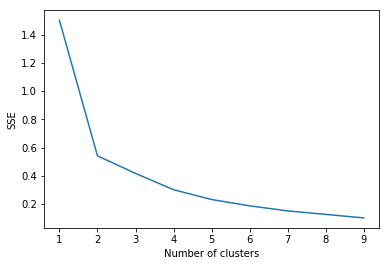

In [53]:
dallas_grouped_clustering = dallas_grouped.drop('Neighborhood', 1)
sse={}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(dallas_grouped_clustering)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

## Silhouette Scores and Cluster Visualizations

In [54]:
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
#import matplotlib.cm as cm
import numpy as np

For 2  Clusters  the average silhouette_score is : 0.7074929224168616
For 3  Clusters  the average silhouette_score is : 0.15021444921370813
For 4  Clusters  the average silhouette_score is : 0.2914219717587309
For 5  Clusters  the average silhouette_score is : 0.13864154811709467


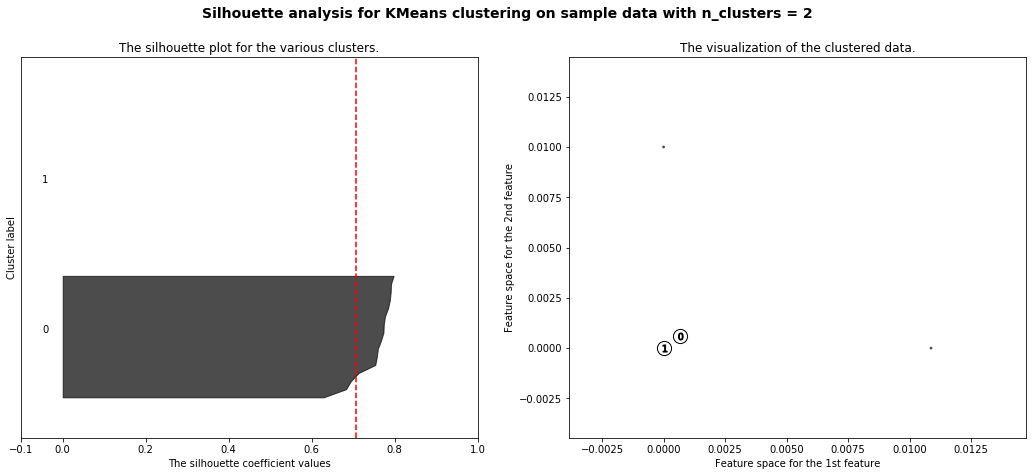

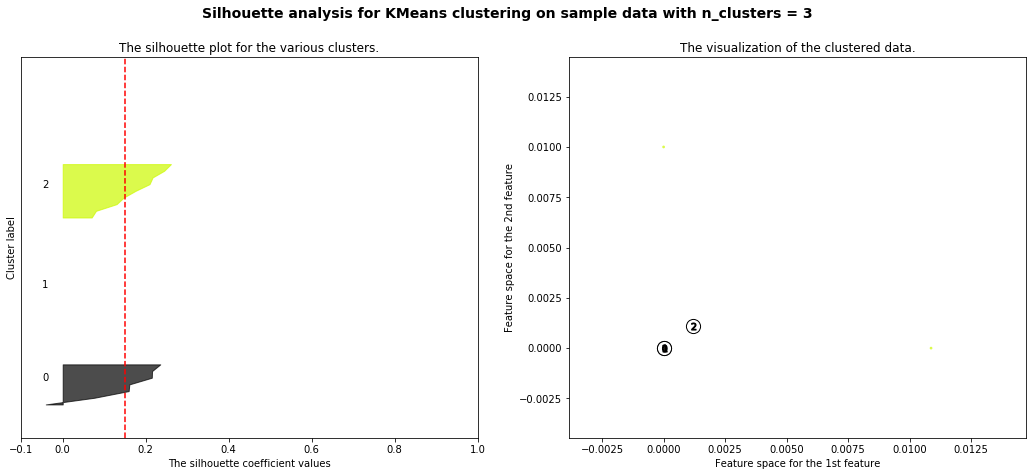

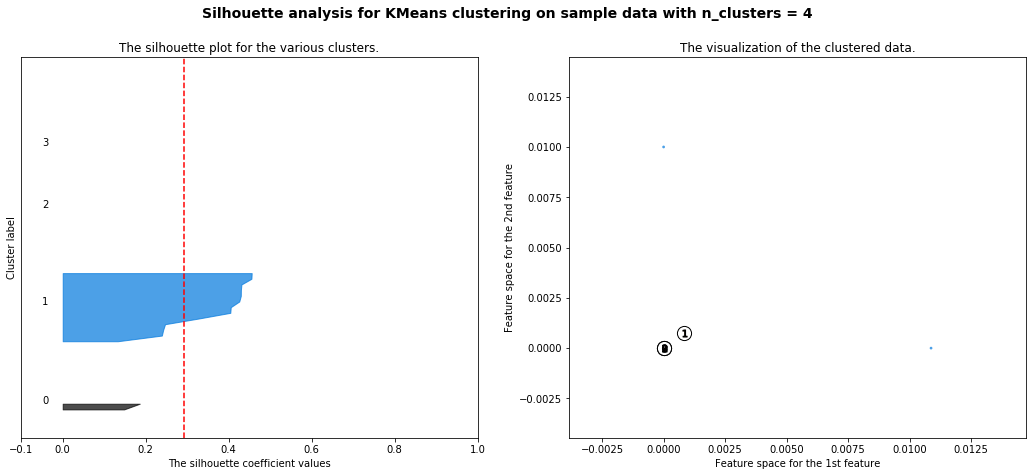

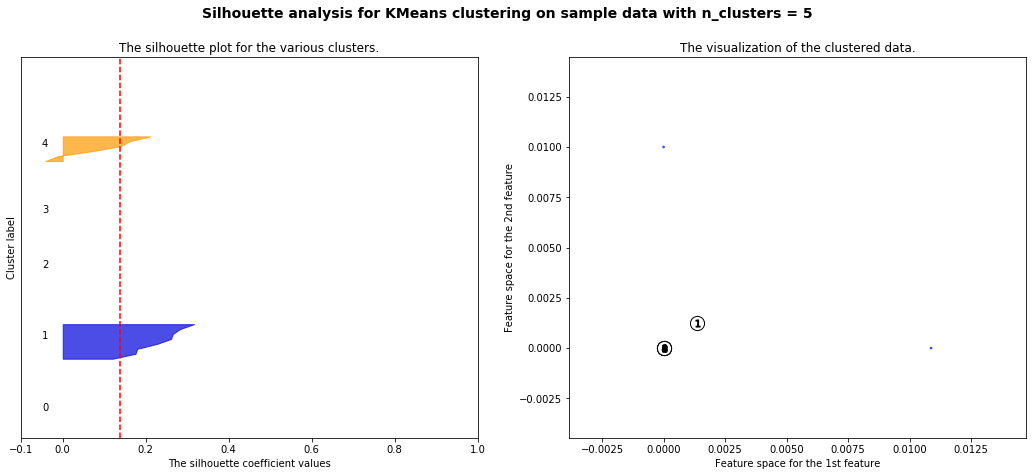

In [55]:
range_n_clusters=[2,3,4,5]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 
    
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(dallas_grouped_clustering) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(dallas_grouped_clustering)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(dallas_grouped_clustering, cluster_labels)
    print("For", n_clusters, " Clusters  "
          "the average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(dallas_grouped_clustering, cluster_labels)

    y_lower = 5
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color1 = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color1, edgecolor=color1, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors2 = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(dallas_grouped_clustering.iloc[:, 0], dallas_grouped_clustering.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors2, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [56]:
dallas_grouped

,Neighborhood,Accessories Store,Advertising Agency,American Restaurant,Antique Shop,Aquarium,Arcade,Art Gallery,Art Museum,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beer Bar,Beer Garden,Big Box Store,Bistro,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Business Service,Café,Cajun / Creole Restaurant,Campground,Candy Store,Caribbean Restaurant,Chinese Restaurant,Churrascaria,Circus,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Electronics Store,Ethiopian Restaurant,Fabric Shop,Farmers Market,Fast Food Restaurant,Food,Food & Drink Shop,Football Stadium,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden Center,Gas Station,Gastropub,General Entertainment,Gift Shop,Go Kart Track,Golf Course,Greek Restaurant,Grocery Store,Gun Range,Gun Shop,Gym,Gym / Fitness Center,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,History Museum,Hobby Shop,Hookah Bar,Hotel,Ice Cream Shop,Indian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Korean Restaurant,Latin American Restaurant,Lingerie Store,Liquor Store,Lounge,Market,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Miscellaneous Shop,Mobile Phone Shop,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Museum,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,Opera House,Organic Grocery,Paintball Field,Paper / Office Supplies Store,Park,Peking Duck Restaurant,Performing Arts Venue,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Piano Bar,Pizza Place,Playground,Plaza,Pool,Pool Hall,Pub,Racetrack,Ramen Restaurant,Recreation Center,Rental Car Location,Resort,Restaurant,Roller Rink,Salad Place,Salon / Barbershop,Sandwich Place,Science Museum,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Skate Park,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Spa,Sporting Goods Shop,Sports Bar,Stables,Stadium,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Weight Loss Center,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Addison,0.00000,0.01,0.070000,0.000000,0.00,0.00000,0.00000,0.00,0.020000,0.010000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.00,0.01,0.00,0.000000,0.00,0.000000,0.00,0.01,0.020000,0.00,0.00,0.000000,0.040000,0.000000,0.000000,0.01000,0.000000,0.00,0.00,0.000000,0.01,0.000000,0.000000,0.00,0.030000,0.01,0.00,0.0,0.000000,0.000000,0.00,0.00,0.020000,0.000000,0.000000,0.020000,0.010000,0.00,0.00,0.000000,0.000000,0.00,0.00000,0.01,0.000000,0.00,0.010000,0.000000,0.01,0.000000,0.00,0.010000,0.00,0.000000,0.00000,0.00,0.000000,0.00000,0.000000,0.00000,0.00,0.000000,0.01,0.010000,0.000000,0.000000,0.020000,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.00,0.00,0.01,0.00,0.010000,0.000000,0.00,0.000000,0.070000,0.00,0.00000,0.00,0.00,0.01000,0.000000,0.030000,0.00,0.000000,0.000000,0.01,0.000000,0.080000,0.000000,0.000000,0.00,0.00,0.010000,0.000000,0.000000,0.010000,0.00,0.000000,0.01,0.00,0.00,0.000000,0.000000,0.010000,0.00,0.01,0.00,0.00,0.000000,0.000000,0.01,0.020000,0.000000,0.00000,0.00,0.00,0.02,0.000000,0.00,0.00,0.000000,0.00,0.020000,0.000000,0.01,0.000000,0.030000,0.00,0.030000,0.000000,0.000000,0.010000,0.00000,0.000000,0.01,0.000000,0.00000,0.000000,0.00,0.010000,0.01,0.00000,0.000000,0.000000,0.00,0.04,0.000000,0.000000,0

In [57]:
kclusters = 5

dallas_grouped_clustering = dallas_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(dallas_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([2, 2, 2, 2, 2, 0, 0, 2, 0, 3, 0, 0, 2, 2, 1, 4, 3], dtype=int32)

In [58]:
neighborhoods_venues_sorted.shape

(17, 11)

In [59]:
dallas_grouped_clustering.shape

(17, 193)

In [60]:
df_dallas.shape

(17, 4)

In [62]:
kmeans.labels_.shape

(17,)

In [63]:
dallas_grouped.shape

(17, 194)

In [64]:
dallas_merged = df_dallas

# add clustering labels
dallas_merged['Cluster Labels'] = kmeans.labels_

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
dallas_merged = dallas_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

dallas_merged.head() # check the last columns!

,PostalCode,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,75001,Addison,32.960047,-96.838522,2,Mexican Restaurant,American Restaurant,Italian Restaurant,Burger Joint,Steakhouse,Coffee Shop,Seafood Restaurant,Liquor Store,Thai Restaurant,Sandwich Place
1,75006,Carrollton,32.962141,-96.898585,2,Korean Restaurant,Mexican Restaurant,Coffee Shop,Pizza Place,Burger Joint,Bakery,Ice Cream Shop,Supermarket,Fast Food Restaurant,Bookstore
2,75019,Coppell,32.963417,-96.984664,2,Park,Fast Food Restaurant,Pizza Place,Sandwich Place,Mexican Restaurant,American Restaurant,Grocery Store,Burger Joint,Pharmacy,Coffee Shop
3,75040,Garland,32.928902,-96.619782,2,Mexican Restaurant,Burger Joint,BBQ Joint,American Restaurant,Clothing Store,Coffee Shop,Discount Store,Bookstore,Cosmetics Shop,Sushi Restaurant
4,75048,Sachse,32.968973,-96.580671,2,Pub,Bar,Cosmetics Shop,Sandwich Place,Fried Chicken Joint,Nail Salon,Burger Joint,Building,Mexican Restaurant,Big Box Store


In [65]:
map_clusters = folium.Map(location=[latitude_x, longitude_y], zoom_start=11)
import matplotlib.colors as colors
# set color scheme for the clusters
x = np.arange(kclusters)
colors_array = cm.rainbow(np.linspace(0, 1, kclusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]
print(rainbow)
# add markers to the map
markers_colors = []
for lat, lon, nei , cluster in zip(dallas_merged['Latitude'], dallas_merged['Longitude'], dallas_merged['Neighborhood'], dallas_merged['Cluster Labels']):
    label = folium.Popup(str(nei) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

['#8000ff', '#00b5eb', '#80ffb4', '#ffb360', '#ff0000']


### Examine Clusters
Now, Examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories

#### Cluster1

In [66]:
df1=dallas_merged.loc[dallas_merged['Cluster Labels'] == 0,dallas_merged.columns[[1] + list(range(5, dallas_merged.shape[1]))]]
df1

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Grand Prairie,Convenience Store,Gas Station,Pizza Place,Sandwich Place,Restaurant,Fast Food Restaurant,Park,Shipping Store,Circus,Coffee Shop
6,Richardson,Mexican Restaurant,Coffee Shop,Bakery,Burger Joint,Sandwich Place,Indian Restaurant,BBQ Joint,Pizza Place,Park,Mediterranean Restaurant
8,Desoto,Fast Food Restaurant,Pizza Place,Convenience Store,Discount Store,Sandwich Place,Pharmacy,American Restaurant,Grocery Store,Burger Joint,Bank
10,Lancaster,Fast Food Restaurant,Discount Store,Gas Station,Pizza Place,Pharmacy,Convenience Store,Gym / Fitness Center,Cosmetics Shop,Taco Place,Donut Shop
11,Hutchins,Fast Food Restaurant,Convenience Store,Hotel,Toy / Game Store,Business Service,Gas Station,Stables,Food,Park,Liquor Store


#### Cluster 2

In [67]:
df2=dallas_merged.loc[dallas_merged['Cluster Labels'] == 1,dallas_merged.columns[[1] + list(range(5, dallas_merged.shape[1]))]]
df2

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,Wilmer,Fast Food Restaurant,Discount Store,Sandwich Place,Bar,Train Station,Gas Station,Convenience Store,American Restaurant,Diner,Business Service


### Cluster 3

In [68]:
df3=dallas_merged.loc[dallas_merged['Cluster Labels'] == 2,dallas_merged.columns[[1] + list(range(5, dallas_merged.shape[1]))]]
df3

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Addison,Mexican Restaurant,American Restaurant,Italian Restaurant,Burger Joint,Steakhouse,Coffee Shop,Seafood Restaurant,Liquor Store,Thai Restaurant,Sandwich Place
1,Carrollton,Korean Restaurant,Mexican Restaurant,Coffee Shop,Pizza Place,Burger Joint,Bakery,Ice Cream Shop,Supermarket,Fast Food Restaurant,Bookstore
2,Coppell,Park,Fast Food Restaurant,Pizza Place,Sandwich Place,Mexican Restaurant,American Restaurant,Grocery Store,Burger Joint,Pharmacy,Coffee Shop
3,Garland,Mexican Restaurant,Burger Joint,BBQ Joint,American Restaurant,Clothing Store,Coffee Shop,Discount Store,Bookstore,Cosmetics Shop,Sushi Restaurant
4,Sachse,Pub,Bar,Cosmetics Shop,Sandwich Place,Fried Chicken Joint,Nail Salon,Burger Joint,Building,Mexican Restaurant,Big Box Store
7,Cedar Hill,Fast Food Restaurant,Pizza Place,Burger Joint,American Restaurant,Mexican Restaurant,Rental Car Location,Bakery,Smoothie Shop,Chinese Restaurant,Mobile Phone Shop
12,Mesquite,Fast Food Restaurant,Discount Store,Convenience Store,Mexican Restaurant,Gas Station,Pizza Place,Hotel,Breakfast Spot,Burger Joint,Sandwich Place
13,Seagoville,Construction & Landscaping,Yoga Studio,Fabric Shop,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Football Stadium,Food & Drink Shop,Food


In [69]:
clusters=pd.DataFrame({"Cluster1":df1["Neighborhood"],
                      "Cluster2":df2["Neighborhood"],
                      "Cluster3":df3["Neighborhood"]
                      })

In [70]:
clusters = clusters.replace(np.nan,' ', regex=True)
clusters

,Cluster1,Cluster2,Cluster3
0,,,Addison
1,,,Carrollton
2,,,Coppell
3,,,Garland
4,,,Sachse
5,Grand Prairie,,
6,Richardson,,
7,,,Cedar Hill
8,Desoto,,
10,Lancaster,,


In [71]:
new_dallas=dallas_merged.set_index("Neighborhood",drop=True)
new_dallas

,PostalCode,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Neighborhood,,,,,,,,,,,,,,
Addison,75001,32.960047,-96.838522,2,Mexican Restaurant,American Restaurant,Italian Restaurant,Burger Joint,Steakhouse,Coffee Shop,Seafood Restaurant,Liquor Store,Thai Restaurant,Sandwich Place
Carrollton,75006,32.962141,-96.898585,2,Korean Restaurant,Mexican Restaurant,Coffee Shop,Pizza Place,Burger Joint,Bakery,Ice Cream Shop,Supermarket,Fast Food Restaurant,Bookstore
Coppell,75019,32.963417,-96.984664,2,Park,Fast Food Restaurant,Pizza Place,Sandwich Place,Mexican Restaurant,American Restaurant,Grocery Store,Burger Joint,Pharmacy,Coffee Shop
Garland,75040,32.928902,-96.619782,2,Mexican Restaurant,Burger Joint,BBQ Joint,American Restaurant,Clothing Store,Coffee Shop,Discount Store,Bookstore,Cosmetics Shop,Sushi Restaurant
Sachse,75048,32.968973,-96.580671,2,Pub,Bar,Cosmetics Shop,Sandwich Place,Fried Chicken Joint,Nail Salon,Burger Joint,Building,Mexican Restaurant,Big Box Store
Grand Prairie,75050,32.773069,-97.005227,0,Convenience Store,Gas Station,Pizza Place,Sandwich Place,Restaurant,Fast Food Restaurant,Park,Shipping Store,Circus,Coffee Shop
Richardson,75080,32.976063,-96.742080,0,Mexican Restaurant,Coffee Shop,Bakery,Burger Joint,Sandwich Place,Indian Restaurant,BBQ Joint,Pizza Place,Park,Mediterranean Restaurant
Cedar Hill,75104,32.580181,-96.964675,2,Fast Food Restaurant,Pizza Place,Burger Joint,American Restaurant,Mexican Restaurant,Rental Car Location,Bakery,Smoothie Shop,Chinese Restaurant,Mobile Phone Shop
Desoto,75115,32.599427,-96.864075,0,Fast Food Restaurant,Pizza Place,Convenience Store,Discount Store,Sandwich Place,Pharmacy,American Restaurant,Grocery Store,Burger Joint,Bank


In [72]:
import pandas as pd
new_dallas_population=pd.DataFrame({
          
     "White":[8840,75777,28517,130368,14609,92271,66613,15934,11358,19421,7409,2375,82435,1782,3508,607415],
     "Black":[1547,10001,1730,32980,1808,35390,8507,23382,33648,11478,24997,2102,30534,801,317,298993],
"Hispanic":[3290,35710,4365,85784,2832,74893,15489,8405,5914,13480,6164,1883,44133,1875,448,507309],
 "Asian": [969,16008,6133,21352,2259,11475,14981,908,454,647,106,0,4527,0,1049,34263],
  "Hawaiian":[1176,12822,1090,32693,885,28969,5620,3317,2433,5703,2951,678,16678,899,0,216831],  
"Others":[468,3695,1004,7539,601,5629,2958,1241,932,969,757,123,4365,157,137,31733],
})
    
new_dallas_population.head()    

,White,Black,Hispanic,Asian,Hawaiian,Others
0,8840,1547,3290,969,1176,468
1,75777,10001,35710,16008,12822,3695
2,28517,1730,4365,6133,1090,1004
3,130368,32980,85784,21352,32693,7539
4,14609,1808,2832,2259,885,601


In [73]:
new_dallas_population["Neighborhood"]= dallas_merged["Neighborhood"]
new_dallas_population

,White,Black,Hispanic,Asian,Hawaiian,Others,Neighborhood
0,8840,1547,3290,969,1176,468,Addison
1,75777,10001,35710,16008,12822,3695,Carrollton
2,28517,1730,4365,6133,1090,1004,Coppell
3,130368,32980,85784,21352,32693,7539,Garland
4,14609,1808,2832,2259,885,601,Sachse
5,92271,35390,74893,11475,28969,5629,Grand Prairie
6,66613,8507,15489,14981,5620,2958,Richardson
7,15934,23382,8405,908,3317,1241,Cedar Hill
8,11358,33648,5914,454,2433,932,Desoto
9,19421,11478,13480,647,5703,969,Duncanville


In [ ]:
!pip install plotly

In [ ]:
!pip install --upgrade plotly

In [74]:
new_dallas_population["Neighborhood"]= dallas_merged["Neighborhood"]
new_dallas_population1=new_dallas_population.set_index("Neighborhood")
new_dallas_population1.head()

,White,Black,Hispanic,Asian,Hawaiian,Others
Neighborhood,,,,,,
Addison,8840,1547,3290,969,1176,468
Carrollton,75777,10001,35710,16008,12822,3695
Coppell,28517,1730,4365,6133,1090,1004
Garland,130368,32980,85784,21352,32693,7539
Sachse,14609,1808,2832,2259,885,601


In [75]:
Nei1=input("Enter the Neighborhood: ")
Nei2=input("Enter the Neighborhood: ")

Enter the Neighborhood:  Carrollton
Enter the Neighborhood:  Garland


In [76]:
Venue_comparison=new_dallas.loc[[Nei1,Nei2]].T
Venue_comparison

Neighborhood,Carrollton,Garland
PostalCode,75006,75040
Latitude,32.9621,32.9289
Longitude,-96.8986,-96.6198
Cluster Labels,2,2
1st Most Common Venue,Korean Restaurant,Mexican Restaurant
2nd Most Common Venue,Mexican Restaurant,Burger Joint
3rd Most Common Venue,Coffee Shop,BBQ Joint
4th Most Common Venue,Pizza Place,American Restaurant
5th Most Common Venue,Burger Joint,Clothing Store
6th Most Common Venue,Bakery,Coffee Shop


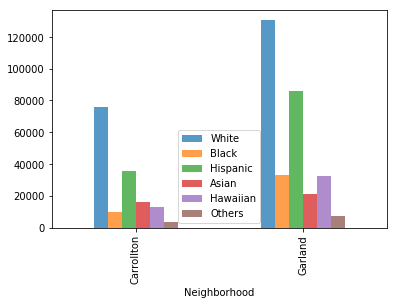

In [77]:
Population_Comparison=new_dallas_population1.loc[[Nei1,Nei2]]
Population_Comparison.plot(kind='bar',alpha=0.75)
plt.show()

In [78]:
Population_Comparison['Hispanic']

Neighborhood
Carrollton    35710
Garland       85784
Name: Hispanic, dtype: int64

# Conclusion:
This Analysis concludes that the two places of Carallton,Garland both has great amenities and locality, but out of these two Garland has the higher number of Mexican population  around 80k ,also top 10 top venues shows Garland has the most common restaurants are Mexican restaurants.Carallton has got a good neighborhood with Korean restaurant, American Restaurant, Coffee shop, Pizza place and many more. Hence Both oCarallton and Garland has thier own advantages !! 

This study helps user to compare two neighborhood and recommend options with facts.